Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Multiple linear regression: Problem solving

In this session, you'll apply multiple linear regression to a new dataset, `ToothGrowth`, which has the following variables:

| Variable | Type    | Description                |
|----------|---------|:----------------------------|
| len      | Ratio   | Tooth length               |
| supp     | Nominal | Supplement type (VC or OJ) |
| dose     | Ratio   | Dose in milligrams/day     |

These data were collected in an experiment measuring the effect of vitamin C supplements (`supp`; either orange juice, `OJ` or ascorbic acid, `VC`) on tooth length (`len`) at three different doses (`dose`; 0.5, 1, and 2 mg/day) in guinea pigs.

Our outcome variable that we'd like to predict is `len`

**QUESTION:**

What relationship to you expect between `dose` and `len`?

**ANSWER: (click here to edit)**

*We would expect there to be greater growth, and therefore longer tooth length (`len`), as a result of more vitamin C (`dose`).*

**QUESTION:**

What relationship do you expect between `supp` and `len`?

**ANSWER: (click here to edit)**

*I don't have an expectation about whether orange juice or ascorbic acid is a better source of vitamin C.*

## Load data

Start with loading `readr` and `dplyr`.

In [1]:
library(readr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load a dataframe with `"datasets/toothgrowth.csv"`, specifying that `supp` is nominal, and display it.

In [2]:
dataframe = readr::read_csv("datasets/toothgrowth.csv",col_types= list(supp = col_factor(c("VC", "OJ"))))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="2"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/toothgrowth.csv</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock_R" id="KNu4?Fn|9Iv#iqv.!Ix8"><field name="CODE">col_types=</field><value name="INPUT"><block type="lists_create_with" id="^vhr*hP8Pn6praJvO^wM"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="ViDkZD*4B*^6F^#HVWLC"><field name="CODE">supp = col_factor(c("VC", "OJ"))</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

len,supp,dose
<dbl>,<fct>,<dbl>
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
⋮,⋮,⋮
30.9,OJ,2
26.4,OJ,2
27.3,OJ,2


**QUESTION:**

Which supplement is base level (or reference level)?

**ANSWER: (click here to edit)**

*Whatever level we listed first in `col_types` is the reference level.*

## Explore data

Load `ggplot2`,`psych`, and `base`.

In [3]:
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="*VxvMC/-.UEwASPz(/;T" x="-92" y="43"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




### Descriptive statistics

Display the overall descriptive statistics.

In [4]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;" x="-132" y="176"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
len,1,60,18.813333,7.6493152,19.25,18.945833,9.04386,4.2,33.9,29.7,-0.1425376,-1.042514,0.98752234
supp*,2,60,1.500000,0.5042195,1.50,1.500000,0.74130,1.0,2.0,1.0,0.0000000,-2.033056,0.06509446
dose,3,60,1.166667,0.6288722,1.00,1.145833,0.74130,0.5,2.0,1.5,0.3722966,-1.549583,0.08118705


**QUESTION:**

If the mean of `supp` is 1.50, what does that tell you?

**ANSWER: (click here to edit)**

*Since `supp` is a factor, the levels are numerically represented as 1 and 2. Since 1.5 is exactly between 1 and 2, half of the guinea pigs got OJ and half got ascorbic acid.*

Get descriptive statistics by group.

In [5]:
psych::describeBy(dataframe,"supp") %>%
    base::unclass()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="pipe_R" id="2N0y_2rglP;N}M_f#[Ow" x="-78" y="202"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;"><mutation items="2"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describeBy</field><data>psych:describeBy</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="text" id="$7)4BSN)4s=qdNFLB6rZ"><field name="TEXT">supp</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="2X~Kdnn=PUM6YsrGLO~Y"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">unclass</field><data>base:unclass</data></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
len,1,30,16.963333,8.2660287,16.5,16.575000,9.26625,4.2,33.9,29.7,0.2756561,-0.9274193,1.5091635
supp*,2,30,1.000000,0.0000000,1.0,1.000000,0.00000,1.0,1.0,0.0,NaN,NaN,0.0000000
dose,3,30,1.166667,0.6342703,1.0,1.145833,0.74130,0.5,2.0,1.5,0.3628717,-1.5983333,0.1158014
,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
len,1,30,20.663333,6.6055610,22.7,21.041667,5.48562,8.2,30.9,22.7,-0.5232055,-1.030564,1.2060049
supp*,2,30,2.000000,0.0000000,2.0,2.000000,0.00000,2.0,2.0,0.0,NaN,NaN,0.0000000
dose,3,30,1.166667,0.6342703,1.0,1.145833,0.74130,0.5,2.0,1.5,0.3628717,-1.598333,0.1158014


**QUESTION:**

Which `supp` had a higher mean `len`?

**ANSWER: (click here to edit)**

*OJ*

**QUESTION:**

Why is the mean `dose` the same for OJ and VC?

**ANSWER: (click here to edit)**

*Because each `supp` got the same doses on average*

### Plots

Create a **boxplot** (`geom_boxplot`) with x as `factor(dose)`, y as `len`, and fill as `supp`.

*Note: Using `factor` creates separate boxes per dosage level; otherwise these will be merged into one big box.*

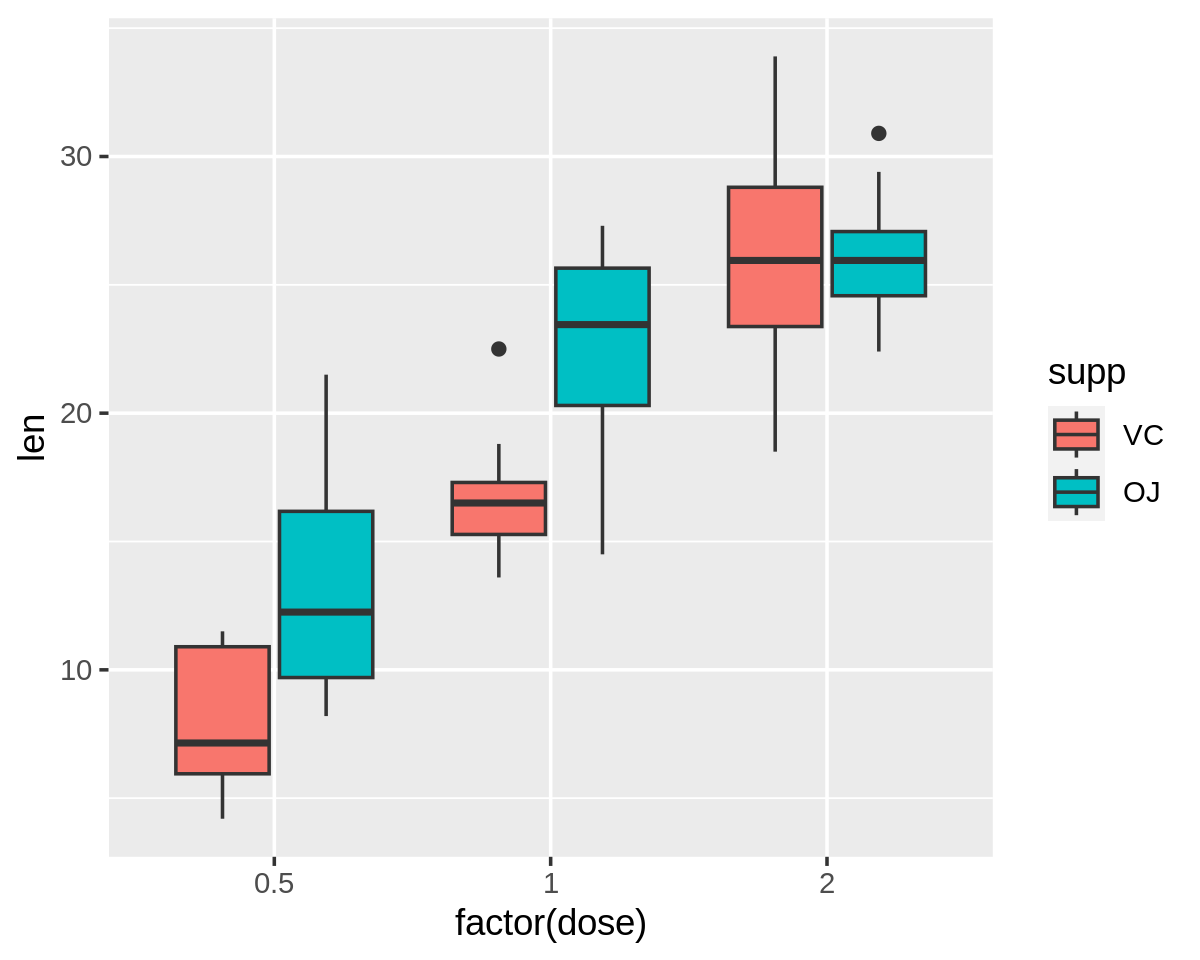

In [6]:
ggplot2::ggplot(dataframe,aes(x=factor(dose), y=len,fill=supp)) +
    ggplot2::geom_boxplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="YOpWo0c7-{Kv5fgkUT,{" x="-51" y="106"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="!I?6+@e{%Fg5wS`13zw!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="H4)le*X{cfhMs5b_M$8;"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d7W@SRx?r[z?ybM?W|TF"><field name="CODE">aes(x=factor(dose), y=len,fill=supp)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="wQ53ik[w+P7D9sZBt2CF"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_boxplot</field><data>ggplot2:geom_boxplot</data></block></value></block></xml>

The box plot matches the descriptive statistics in a useful way:

- The line in the middle of the boxplot is the **median**
- The top/bottoms of each box are the **75th percentile** and **25th percentile**, respectively
- The "whiskers" or bars above and below the box stop at the point furthest from the median that is within 1.5 times the difference between the 75th and 25th percentiles

Boxplots are a good way at getting a feel for the distribution of data, especially when you are comparing two groups like this.

**QUESTION:**

Why didn't we use scatterplots instead? Try it and see.

**ANSWER: (click here to edit)**

*Scatterplots pile up both categories of points on top of each other in a line corresponding to dose. It's really hard to see where the center of the distribution is with scatterplots in this situation.*

**QUESTION:**

Which `supp` has a higher median `len`? 
Is it the same across `dose`? 
What does this tell you?

**ANSWER: (click here to edit)**

*OJ is higher for the two lowest doses but is the same as VC for the highest dose.
Since `supp` seems to change depending on `dose`, we likely have an interaction between `supp` and `dose`.*

## Modeling

### Model 1

Start with a model that predicts `len` based on `dose`.

Load the `recipes` and `workflows` packages, along with `parsnip`, `generics`,`hardhat`, and `broom`.

In [7]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="q@%R}n9%UEeb@_Q;-9e,"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Create a workflow with the  linear regression model.
Remember, the model should predict `len` using `dose` only.

In [8]:
recipe = recipes::recipe(len ~ dose,data = dataframe) %>%
    recipes::step_dummy(recipes::all_nominal_predictors())
model = parsnip::linear_reg() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("lm")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">len ~ dose</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_dummy</field><data>recipes:step_dummy</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_nominal_predictors</field><data>recipes:all_nominal_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">lm</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Train the model using all the data.

In [9]:
trained_model = fit(workflow,data = dataframe)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = dataframe</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         dose  
      7.422        9.764  


Get the $r^2$.

In [10]:
trained_model %>%
    hardhat::extract_fit_engine() %>%
    base::summary()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu" x="-112" y="162"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="4ulNX*c7V_BV8hyrFBTr"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data></block></value></block></xml>


Call:
stats::lm(formula = ..y ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4496 -2.7406 -0.7452  2.8344 10.1139 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.4225     1.2601    5.89 2.06e-07 ***
dose          9.7636     0.9525   10.25 1.23e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.601 on 58 degrees of freedom
Multiple R-squared:  0.6443,	Adjusted R-squared:  0.6382 
F-statistic: 105.1 on 1 and 58 DF,  p-value: 1.233e-14


**QUESTION:**

Do you think this is a good $r^2$?
Why or why not?

**ANSWER: (click here to edit)**

*The model captures 64% of the variance, which isn't bad. We might be able to do better with a little more work.*

### Diagnostics 1

Get the predictions and residuals from the model and put them in a dataframe.

In [11]:
data_evaluation = generics::augment(trained_model %>%
    hardhat::extract_fit_engine(),dataframe)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU" x="-188" y="87"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

len,supp,dose,.fitted,.hat,.sigma,.cooksd,.std.resid
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.2,VC,0.5,12.30429,0.03571429,4.510792,0.0595789997,-1.7936739
11.5,VC,0.5,12.30429,0.03571429,4.640089,0.0005867923,-0.1780078
7.3,VC,0.5,12.30429,0.03571429,4.592012,0.0227168398,-1.1075691
5.8,VC,0.5,12.30429,0.03571429,4.557686,0.0383762859,-1.4395553
6.4,VC,0.5,12.30429,0.03571429,4.572521,0.0316226638,-1.3067608
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
30.9,OJ,2,26.94964,0.04642857,4.610324,0.0188184912,0.8792074
26.4,OJ,2,26.94964,0.04642857,4.640758,0.0003643118,-0.1223307
27.3,OJ,2,26.94964,0.04642857,4.641114,0.0001480246,0.0779769


**QUESTION:**

How many predictions did you get? Why?

**ANSWER: (click here to edit)**

*Three predictions for three doses; 60 total.*

**QUESTION:**

How do the residuals compare to the predictions? Why?

**ANSWER: (click here to edit)**

*The residuals are all different even though there are only three prediction values. 
This is because the residuals are also based on `len`, which is different for the 60 guinea pigs.*

Load `ggfortify`.

In [13]:
library(ggfortify)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tf(leE=z8{GT1?Sd7e|U">ggfortify</variable></variables><block type="import_R" id="{a@kEnYPhSWh19~lkOXv" x="-187" y="-24"><field name="libraryName" id="tf(leE=z8{GT1?Sd7e|U">ggfortify</field></block></xml>

Use `autoplot` to check linearity and equal variance.

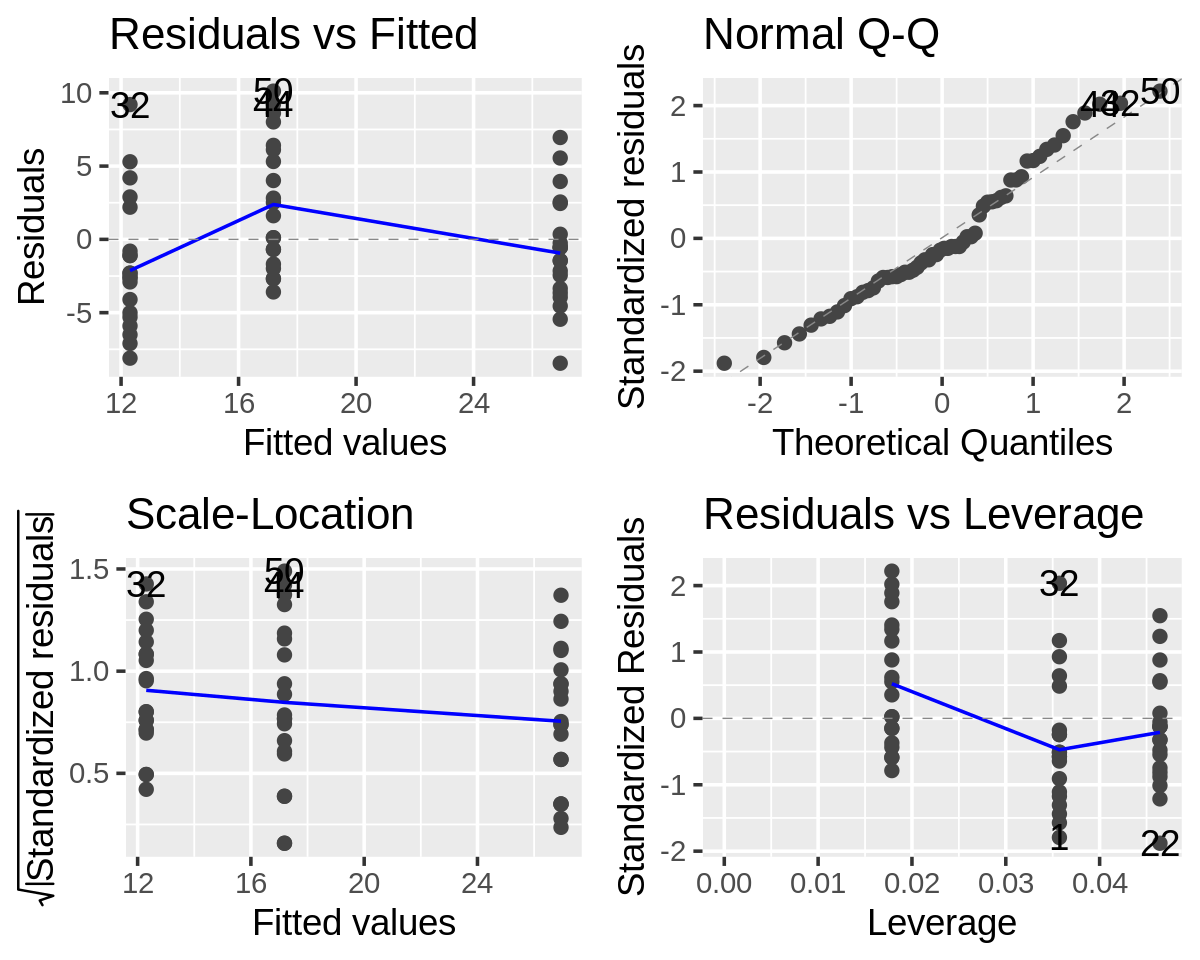

In [14]:
ggplot2::autoplot(trained_model %>%
    hardhat::extract_fit_engine())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="varDoMethod_R" id="eH5:NQO]BK?da)P[H/+C" x="-195" y="142"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">autoplot</field><data>ggplot2:autoplot</data><value name="ADD0"><block type="pipe_R" id=")gqcCK8SG#?qxc!4ozue"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="4[h3/dELtUSw9fAx4Bc*"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="qxx|d][;K]DL=rZlWgUq"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value></block></xml>

Plot residual vs. predicted using boxplots to better show the distribution of dots in the autoplot.

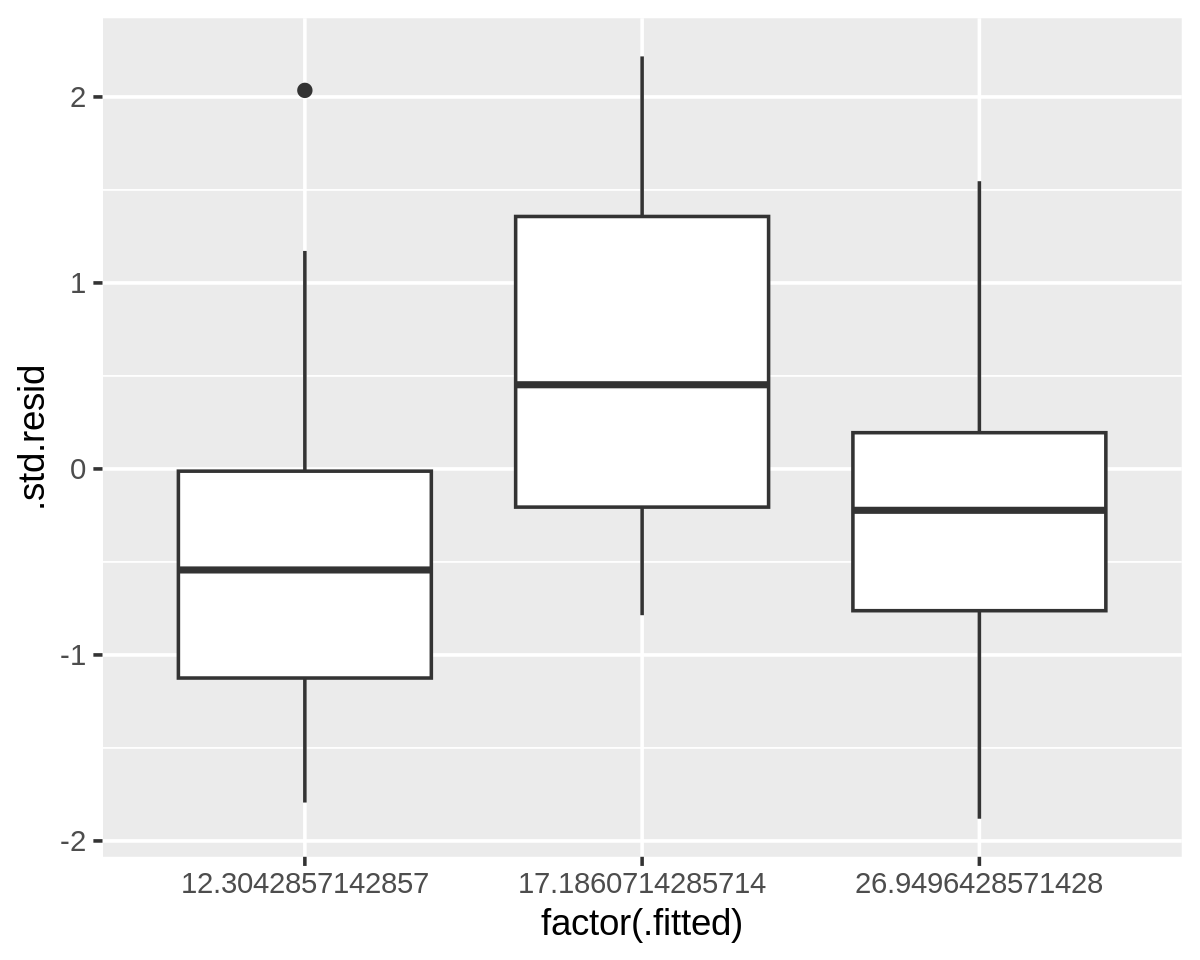

In [18]:
ggplot2::ggplot(data_evaluation,aes(x=factor(.fitted), y=.std.resid)) +
    ggplot2::geom_boxplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="ggplot_plus_R" id="YOpWo0c7-{Kv5fgkUT,{" x="-51" y="106"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="!I?6+@e{%Fg5wS`13zw!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="H4)le*X{cfhMs5b_M$8;"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d7W@SRx?r[z?ybM?W|TF"><field name="CODE">aes(x=factor(.fitted), y=.std.resid)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="wQ53ik[w+P7D9sZBt2CF"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_boxplot</field><data>ggplot2:geom_boxplot</data></block></value></block></xml>

**QUESTION:**

What is the advantage of the boxplot over the autoplot?

**ANSWER: (click here to edit)**

*It's hard to see how the dots in the autoplot are distributed. The boxplot shows this distribution.*

**QUESTION:**

Do we have linearity and equal variance? Why?

**ANSWER: (click here to edit)**

*We have somewhat equal variance since the boxes are about the same height and the whiskers are about the same height for all doses.
However, we don't have linearity because the the residuals are "humped" in the middle and low on the ends.*

### Model 2

Create a workflow with an interaction step for `dose:starts_with("supp")`.
Your formula will need to have `dose + supp` as well.

Train a model using the workflow and create evaluation data.

*Note: `starts_with("supp")` must be used instead of `supp` because `step_dummy` creates new variable names based on `supp`. Since these new names start with `supp`, we can select them all using `starts_with("supp")`.*

In [26]:
workflow = workflow %>%
    workflows::update_recipe(recipes::recipe(len ~ dose + supp,data = dataframe) %>%
    recipes::step_dummy(recipes::all_nominal_predictors()) %>%
    recipes::step_interact(~ dose:starts_with("supp")))
trained_model = generics::fit(workflow,data = dataframe)
data_evaluation = generics::augment(trained_model %>%
    hardhat::extract_fit_engine(),dataframe)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id="iAXV:^yL4/lXHXq9-fWq" x="-266" y="164"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Oc60%_2o@.oLe%Y#3?BI"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="DLhYW=bspAQ$a:^k%4!`"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="uerg~4,OSsOP%Q_GMx!W"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">update_recipe</field><data>workflows:update_recipe</data><value name="ADD0"><block type="pipe_R" id="B.*cc=E%xNwq$Un,Ax.="><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="wZSxK-Q`YDupD0Z0RCJo"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id=".`h)ou@92pRPBxignHeV"><field name="CODE">len ~ dose + supp</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="rp,;{Y+|Eb#~Fe(Ttax."><field name="CODE">data = dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="i)}I$#|,2*1I7:i=B!Nn"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_dummy</field><data>recipes:step_dummy</data><value name="ADD0"><block type="varDoMethod_R" id=".MhjxJkR~4.z|JSj3NvB"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_nominal_predictors</field><data>recipes:all_nominal_predictors</data></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="8$[|48vu[DGl2$Fb|S!P"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_interact</field><data>recipes:step_interact</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="LCeBuURaO3kA$ndHfvDD"><field name="CODE"> ~ dose:starts_with("supp")</field></block></value></block></value></block></value></block></value></block></value><next><block type="variables_set" id="JYRrWzO%n`MVx/]/0-U="><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="G;Ti7zT)NN:K~,?6G@Sc"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="UQ+4F`M!L]%Rl`2JZ/|*"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="qT3l1#t])/i6SVL5ySZ;"><field name="CODE">data = dataframe</field></block></value></block></value><next><block type="variables_set" id="k8r|aUDcbLq1vC?=V^iX"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="WA/F//on%eutX+nvUVl8"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="pipe_R" id=",]FT3H:+%VcE9#Wd#haC"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id=")zN@?FwwC~-?:pGhm:U2"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="Z$lk4imCmH.F,W;cq/({"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value><value name="ADD1"><block type="variables_get" id="jABx2P(}|Eo25i(kKefw"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="O%EwXHU~c#yIb@5Ag/|," x="-262" y="598"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

len,supp,dose,.fitted,.hat,.sigma,.cooksd,.std.resid
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.2,VC,0.5,9.152857,0.07142857,4.061386,0.030472205,-1.2587909
11.5,VC,0.5,9.152857,0.07142857,4.106983,0.006843391,0.5965369
7.3,VC,0.5,9.152857,0.07142857,4.111929,0.004264579,-0.4709120
5.8,VC,0.5,9.152857,0.07142857,4.093295,0.013964403,-0.8521437
6.4,VC,0.5,9.152857,0.07142857,4.102048,0.009413684,-0.6996510
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
30.9,OJ,2,27.17286,0.09285714,4.086166,2.350536e-02,0.95839307
26.4,OJ,2,27.17286,0.09285714,4.118642,1.010679e-03,-0.19873156
27.3,OJ,2,27.17286,0.09285714,4.120055,2.735261e-05,0.03269336


### Diagnostics 2

Examine the predictions for each `supp` and `dose`.
Since these are repeated in the data, you can use `dplyr` to get the distinct values:

- `pipe`
    - `data_evaluation`
- to with `dplyr` do `select`
    - using `supp,dose,.fitted`
- then to with `dplyr` do `distinct`

In [35]:
data_evaluation %>%
    dplyr::select(supp,dose,.fitted) %>%
    dplyr::distinct()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="pipe_R" id="Nz@e^I]Fz[b[xn?hEU?g" x="-136" y="312"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="O|[}5U($NIM]t-(wZXxQ"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="%qdcO~XJ@80$atld:8t6"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="8/%S9bUbD(34-yr%}X0n"><field name="CODE">supp,dose,.fitted</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="/I`cWC;~fnsA4l^Rw.$D"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">distinct</field><data>dplyr:distinct</data></block></value></block></xml>

supp,dose,.fitted
<fct>,<dbl>,<dbl>
VC,0.5,9.152857
VC,1.0,15.010714
VC,2.0,26.726429
OJ,0.5,15.455714
OJ,1.0,19.361429
OJ,2.0,27.172857


**QUESTION:**

What are the values of the new predictions across the dataframe? 
How do they differ between OJ and VC?

**ANSWER: (click here to edit)**

*There are 3 predictions for VC and 3 different predictions for OJ. 
For the two lower doses, the predictions are greater for OJ than VC by about 5 units.
For the highest dose, the predictions are almost the same with OJ being higher than VC by about 1 unit.*

Plot the predicted vs residuals **as a boxplot** to check linearity and equal variance.

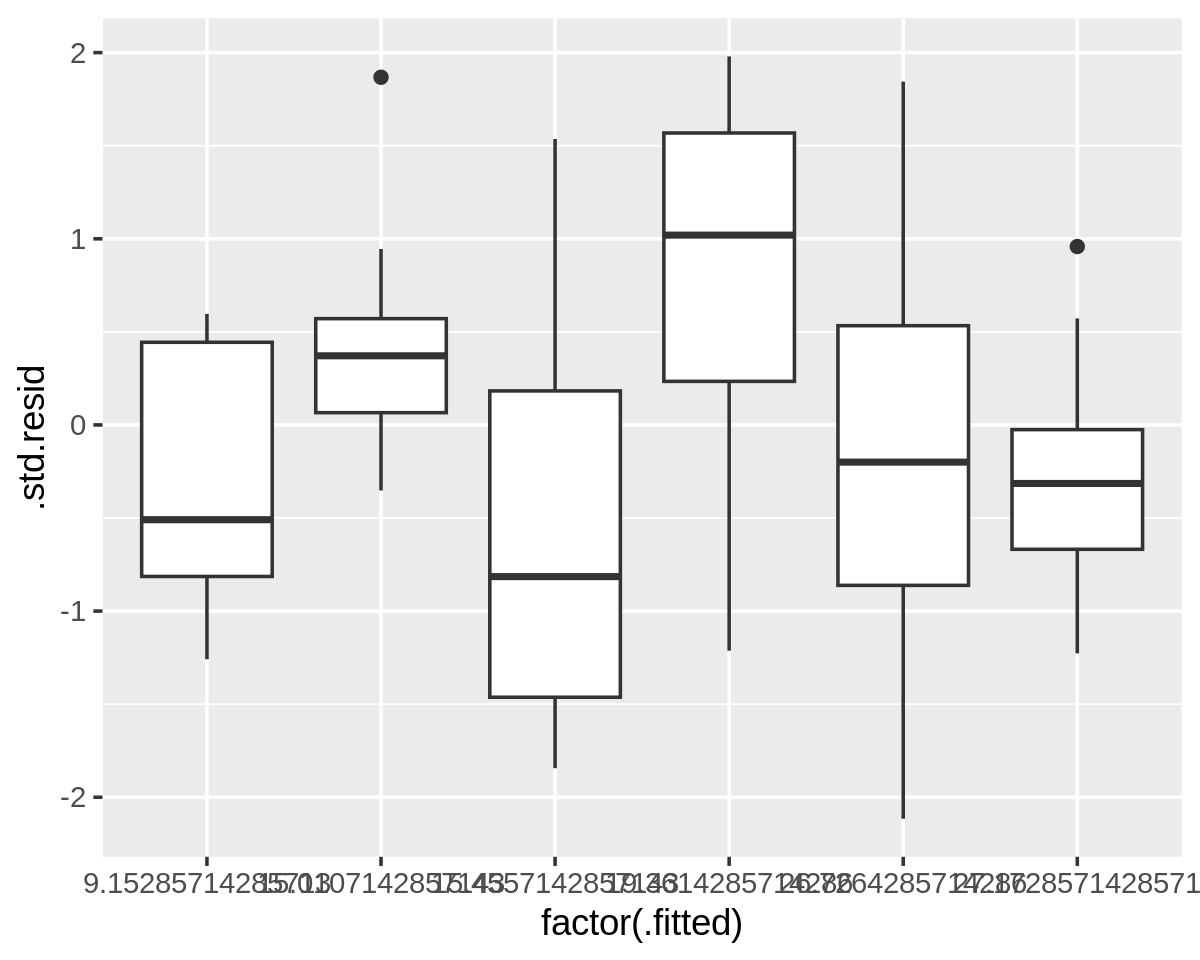

In [38]:
ggplot2::ggplot(data_evaluation,aes(x=factor(.fitted), y=.std.resid)) +
    ggplot2::geom_boxplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="ggplot_plus_R" id="YOpWo0c7-{Kv5fgkUT,{" x="-51" y="106"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="!I?6+@e{%Fg5wS`13zw!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="H4)le*X{cfhMs5b_M$8;"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d7W@SRx?r[z?ybM?W|TF"><field name="CODE">aes(x=factor(.fitted), y=.std.resid)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="wQ53ik[w+P7D9sZBt2CF"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_boxplot</field><data>ggplot2:geom_boxplot</data></block></value></block></xml>

**QUESTION:**

Do we have linearity and equal variance? Why?

**ANSWER: (click here to edit)**

*Equal variance seems to be a bit worse in this model because of the two small boxes. 
The rest of the boxes have about the same size but uneven whiskers.
Linearity does not seem improved: there is still a bit of a hump in the data.*

With this new model, calculate $r^2$:

In [37]:
trained_model %>%
    hardhat::extract_fit_engine() %>%
    base::summary()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu" x="-112" y="162"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="4ulNX*c7V_BV8hyrFBTr"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data></block></value></block></xml>


Call:
stats::lm(formula = ..y ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2264 -2.8462  0.0504  2.2893  7.9386 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.295      1.581   2.084 0.041772 *  
dose             11.716      1.195   9.800 9.44e-14 ***
supp_OJ           8.255      2.236   3.691 0.000507 ***
dose_x_supp_OJ   -3.904      1.691  -2.309 0.024631 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.083 on 56 degrees of freedom
Multiple R-squared:  0.7296,	Adjusted R-squared:  0.7151 
F-statistic: 50.36 on 3 and 56 DF,  p-value: 6.521e-16


**QUESTION:**

How does this $r^2$ compare to the model without the interaction?

**ANSWER: (click here to edit)**

*It's about .08 higher*

<!--  -->